# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

who would be the studio executives,stakeholders, data scientist or anybody who is interested in understanding box office trends for informed decisions about future release,marketing etc 
what : the dataset is about movie box office trends from 2000 to 2024 show how certain genres and release timings consistently drive revenue
how:I'll use visual explanation to explore some trends and communicate my insights

Movies Box office Dataset (2000-2024)

https://www.kaggle.com/datasets/aditya126/movies-box-office-dataset-2000-2024

# 3. Homework - work with your own data

In [63]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [64]:
df_movies = pd.read_csv("https://raw.githubusercontent.com/Marara29/Boston-University-Activities/refs/heads/main/enhanced_box_office_data(2000-2024)u.csv?token=GHSAT0AAAAAAC57Y4SX3CGCKN42IUHQ35NI2CLZM5Q")

HTTPError: HTTP Error 404: Not Found

# Summarize the datasets using info() and describe()

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  5000 non-null   int64  
 1   Release Group         5000 non-null   object 
 2   $Worldwide            5000 non-null   float64
 3   $Domestic             5000 non-null   float64
 4   Domestic %            5000 non-null   float64
 5   $Foreign              5000 non-null   float64
 6   Foreign %             5000 non-null   float64
 7   Year                  5000 non-null   int64  
 8   Genres                4822 non-null   object 
 9   Rating                4830 non-null   object 
 10  Vote_Count            4830 non-null   float64
 11  Original_Language     4830 non-null   object 
 12  Production_Countries  4800 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 507.9+ KB


In [ ]:
df_movies.describe(include='all')

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
count,5000.00000,5000,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,4822,4830,4830.000000,4830,4800
unique,NaN,4955,NaN,NaN,NaN,NaN,NaN,NaN,1317,1829,NaN,35,510
top,NaN,Hero,NaN,NaN,NaN,NaN,NaN,NaN,Comedy,6.5/10,NaN,en,United States of America
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,286,102,NaN,3271,1964
mean,100.50000,NaN,1.192137e+08,4.472523e+07,35.740620,7.448809e+07,64.256640,2012.000000,NaN,NaN,2531.585921,NaN,NaN
std,57.74008,NaN,2.005243e+08,7.727026e+07,30.656992,1.334932e+08,30.654531,7.211824,NaN,NaN,3946.272827,NaN,NaN
min,1.00000,NaN,1.666028e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,2000.000000,NaN,NaN,0.000000,NaN,NaN
25%,50.75000,NaN,2.466220e+07,9.275150e+04,0.200000,1.371034e+07,42.200000,2006.000000,NaN,NaN,205.250000,NaN,NaN
50%,100.50000,NaN,4.844658e+07,1.798421e+07,37.050000,3.019444e+07,62.950000,2012.000000,NaN,NaN,1035.500000,NaN,NaN
75%,150.25000,NaN,1.197588e+08,5.386847e+07,57.800000,7.211578e+07,99.800000,2018.000000,NaN,NaN,3065.000000,NaN,NaN


# Are there any duplicate rows?

In [ ]:
duplicate_rows = df_movies[df_movies.duplicated()]
num_duplicates = len(duplicate_rows)
num_duplicates

0

No duplicates rows

# Are there any duplicate values in a given column (when this would be inappropriate?)

In [ ]:
duplicate_values_summary = {}

for column in df_movies.columns:
    value_counts = df_movies[column].value_counts()
    duplicate_values = value_counts[value_counts > 1]
    if not duplicate_values.empty:
        duplicate_values_summary[column] = duplicate_values.head(3)
duplicate_values_summary

{'Rank': Rank
 1    25
 2    25
 3    25
 Name: count, dtype: int64,
 'Release Group': Release Group
 Hero                   4
 Together               2
 You Are My Sunshine    2
 Name: count, dtype: int64,
 '$Worldwide': $Worldwide
 32800000.0    2
 Name: count, dtype: int64,
 '$Domestic': $Domestic
 0.0    1178
 Name: count, dtype: int64,
 'Domestic %': Domestic %
 0.0      1226
 100.0      49
 0.5        29
 Name: count, dtype: int64,
 '$Foreign': $Foreign
 0.0          43
 8200000.0     3
 8700000.0     2
 Name: count, dtype: int64,
 'Foreign %': Foreign %
 100.0    1201
 0.0        52
 99.9       31
 Name: count, dtype: int64,
 'Year': Year
 2000    200
 2001    200
 2002    200
 Name: count, dtype: int64,
 'Genres': Genres
 Comedy             286
 Drama              214
 Comedy, Romance    169
 Name: count, dtype: int64,
 'Rating': Rating
 6.5/10    102
 6.7/10    101
 6.3/10    100
 Name: count, dtype: int64,
 'Vote_Count': Vote_Count
 0.0     25
 5.0     20
 10.0    19
 Name: c

rank should be unique per movie

# What are the mean, median, and mode of each column?

In [ ]:
mean_values = df_movies.mean(numeric_only=True)
median_values = df_movies.median(numeric_only=True)
mode_values = df_movies.mode(numeric_only=True).iloc[0]

#  Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

In [ ]:
df_movies.isnull().sum()

Rank                      0
Release Group             0
$Worldwide                0
$Domestic                 0
Domestic %                0
$Foreign                  0
Foreign %                 0
Year                      0
Genres                  178
Rating                  170
Vote_Count              170
Original_Language       170
Production_Countries    200
dtype: int64

In [ ]:
df_clean=df_movies.dropna()
df_clean

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,196,Devara Part 1,7361414.0,5600000.0,76.1,1761414.0,23.9,2024,"Action, Drama",7.0/10,30.0,te,India
4996,197,Kolpaçino 4 4'lük,7343114.0,0.0,0.0,7343114.0,100.0,2024,Comedy,4.0/10,4.0,tr,Turkey
4997,198,Lim Young Woong: Im Hero the Stadium,7305588.0,0.0,0.0,7305588.0,100.0,2024,"Music, Documentary",0.0/10,0.0,ko,South Korea
4998,199,Yolo,7241561.0,2001584.0,27.6,5239977.0,72.4,2024,"Drama, Comedy, Action",6.3/10,70.0,zh,China


# Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)


In [ ]:
#Check for duplicate ranks 
duplicate_ranks = df_clean[df_clean.duplicated(subset=["Rank"], keep=False)]
len(duplicate_ranks)

4797

# Encode any categorical variables (e.g. with one-hot encoding.)

In [ ]:
categorical_columns = ["Genres", "Rating", "Original_Language", "Production_Countries"]
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns, drop_first=False)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

#yes data is usable as its clean and structured
#some needs modification like ranks 
#there is class imbalance in language ,rating

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

ans:lets see relationship between release year affects its box office success

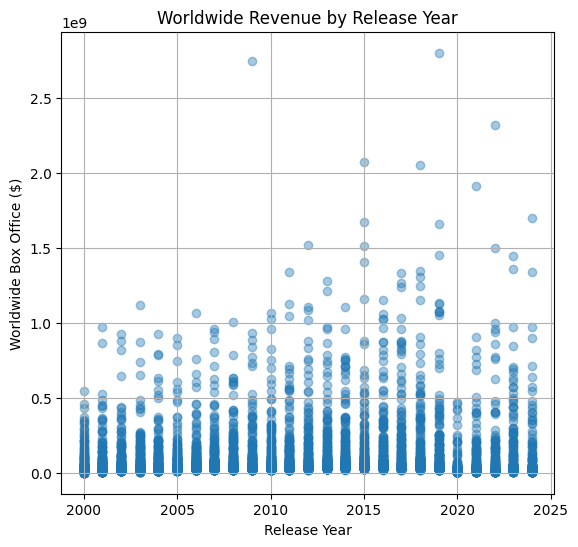

In [ ]:
df = df_clean
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(df["Year"], df["$Worldwide"], alpha=0.4)
plt.title("Worldwide Revenue by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Worldwide Box Office ($)")
plt.grid(True)

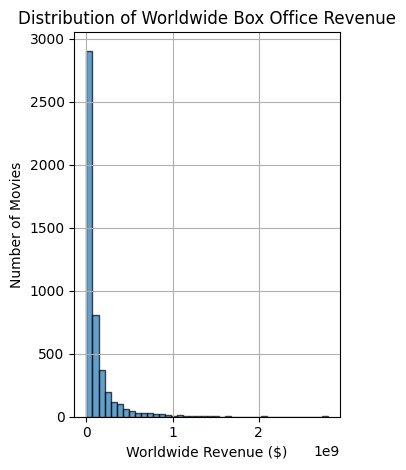

In [ ]:
plt.subplot(1, 2, 2)
plt.hist(df["$Worldwide"], bins=40, edgecolor='black', alpha=0.7)
plt.title("Distribution of Worldwide Box Office Revenue")
plt.xlabel("Worldwide Revenue ($)")
plt.ylabel("Number of Movies")
plt.grid(True)

plt.tight_layout()
plt.show()